<a href="https://colab.research.google.com/github/SuperXoma/Final-project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df = df.drop('lastflag', axis = 1)
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
df_test = pd.read_csv("Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df_test = df_test.drop('lastflag', axis = 1)
df_test

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
combined_df = pd.concat([df, df_test], ignore_index=True)

In [ ]:
combined_df.describe() #вывод статистической информации

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Как мы видим, "land", "urgent", "numfailedlogins", "numoutboundcmds" имеют в основном нулевые значения, поэтому мы можем удалить эти столбцы.

In [ ]:
combined_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [ ]:
combined_df.isnull().values.any() #Проверка отсутствующих значений NaN

False

In [ ]:
combined_df.select_dtypes(include=['category', 'object']).columns #вывод категориальных переменных

Index(['protocoltype', 'service', 'flag', 'attack'], dtype='object')

In [ ]:
combined_df['attack'].loc[combined_df['attack']!='normal']='attack' #заменяем все атаки на одно значение (для бинарной классификации)

attack
normal    77054
attack    71463
Name: count, dtype: int64


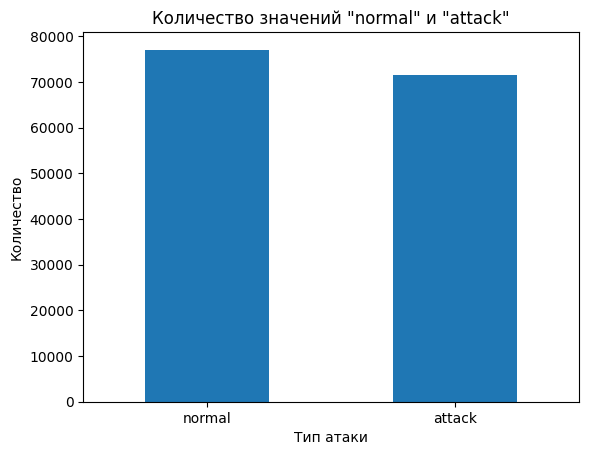

In [ ]:
count = combined_df['attack'].value_counts()

# Вывод количества значений
print(count)

# Построение гистограммы
count.plot(kind='bar')
plt.title('Количество значений "normal" и "attack"')
plt.xlabel('Тип атаки')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Видно, что классы сбалансированные

In [ ]:
percentage_counts = combined_df['attack'].value_counts(normalize=True) * 100
print("Нормальный трафик:", percentage_counts.iloc[0], '%')
print("Трафик злоумышленника:", percentage_counts.iloc[1], '%')

Нормальный трафик: 51.88227610307238 %
Трафик злоумышленника: 48.11772389692762 %


In [ ]:
le=LabelEncoder()

# Преобразуем столбец 'protocoltype' в числовые значения с помощью кодировщика LabelEncoder
combined_df['protocoltype'] = le.fit_transform(combined_df['protocoltype'])

# Преобразуем столбец 'service' в числовые значения с помощью кодировщика LabelEncoder
combined_df['service'] = le.fit_transform(combined_df['service'])

# Преобразуем столбец 'flag' в числовые значения с помощью кодировщика LabelEncoder
combined_df['flag'] = le.fit_transform(combined_df['flag'])

# Преобразуем столбец 'attack' в числовые значения с помощью кодировщика LabelEncoder
combined_df['attack'] = le.fit_transform(combined_df['attack'])

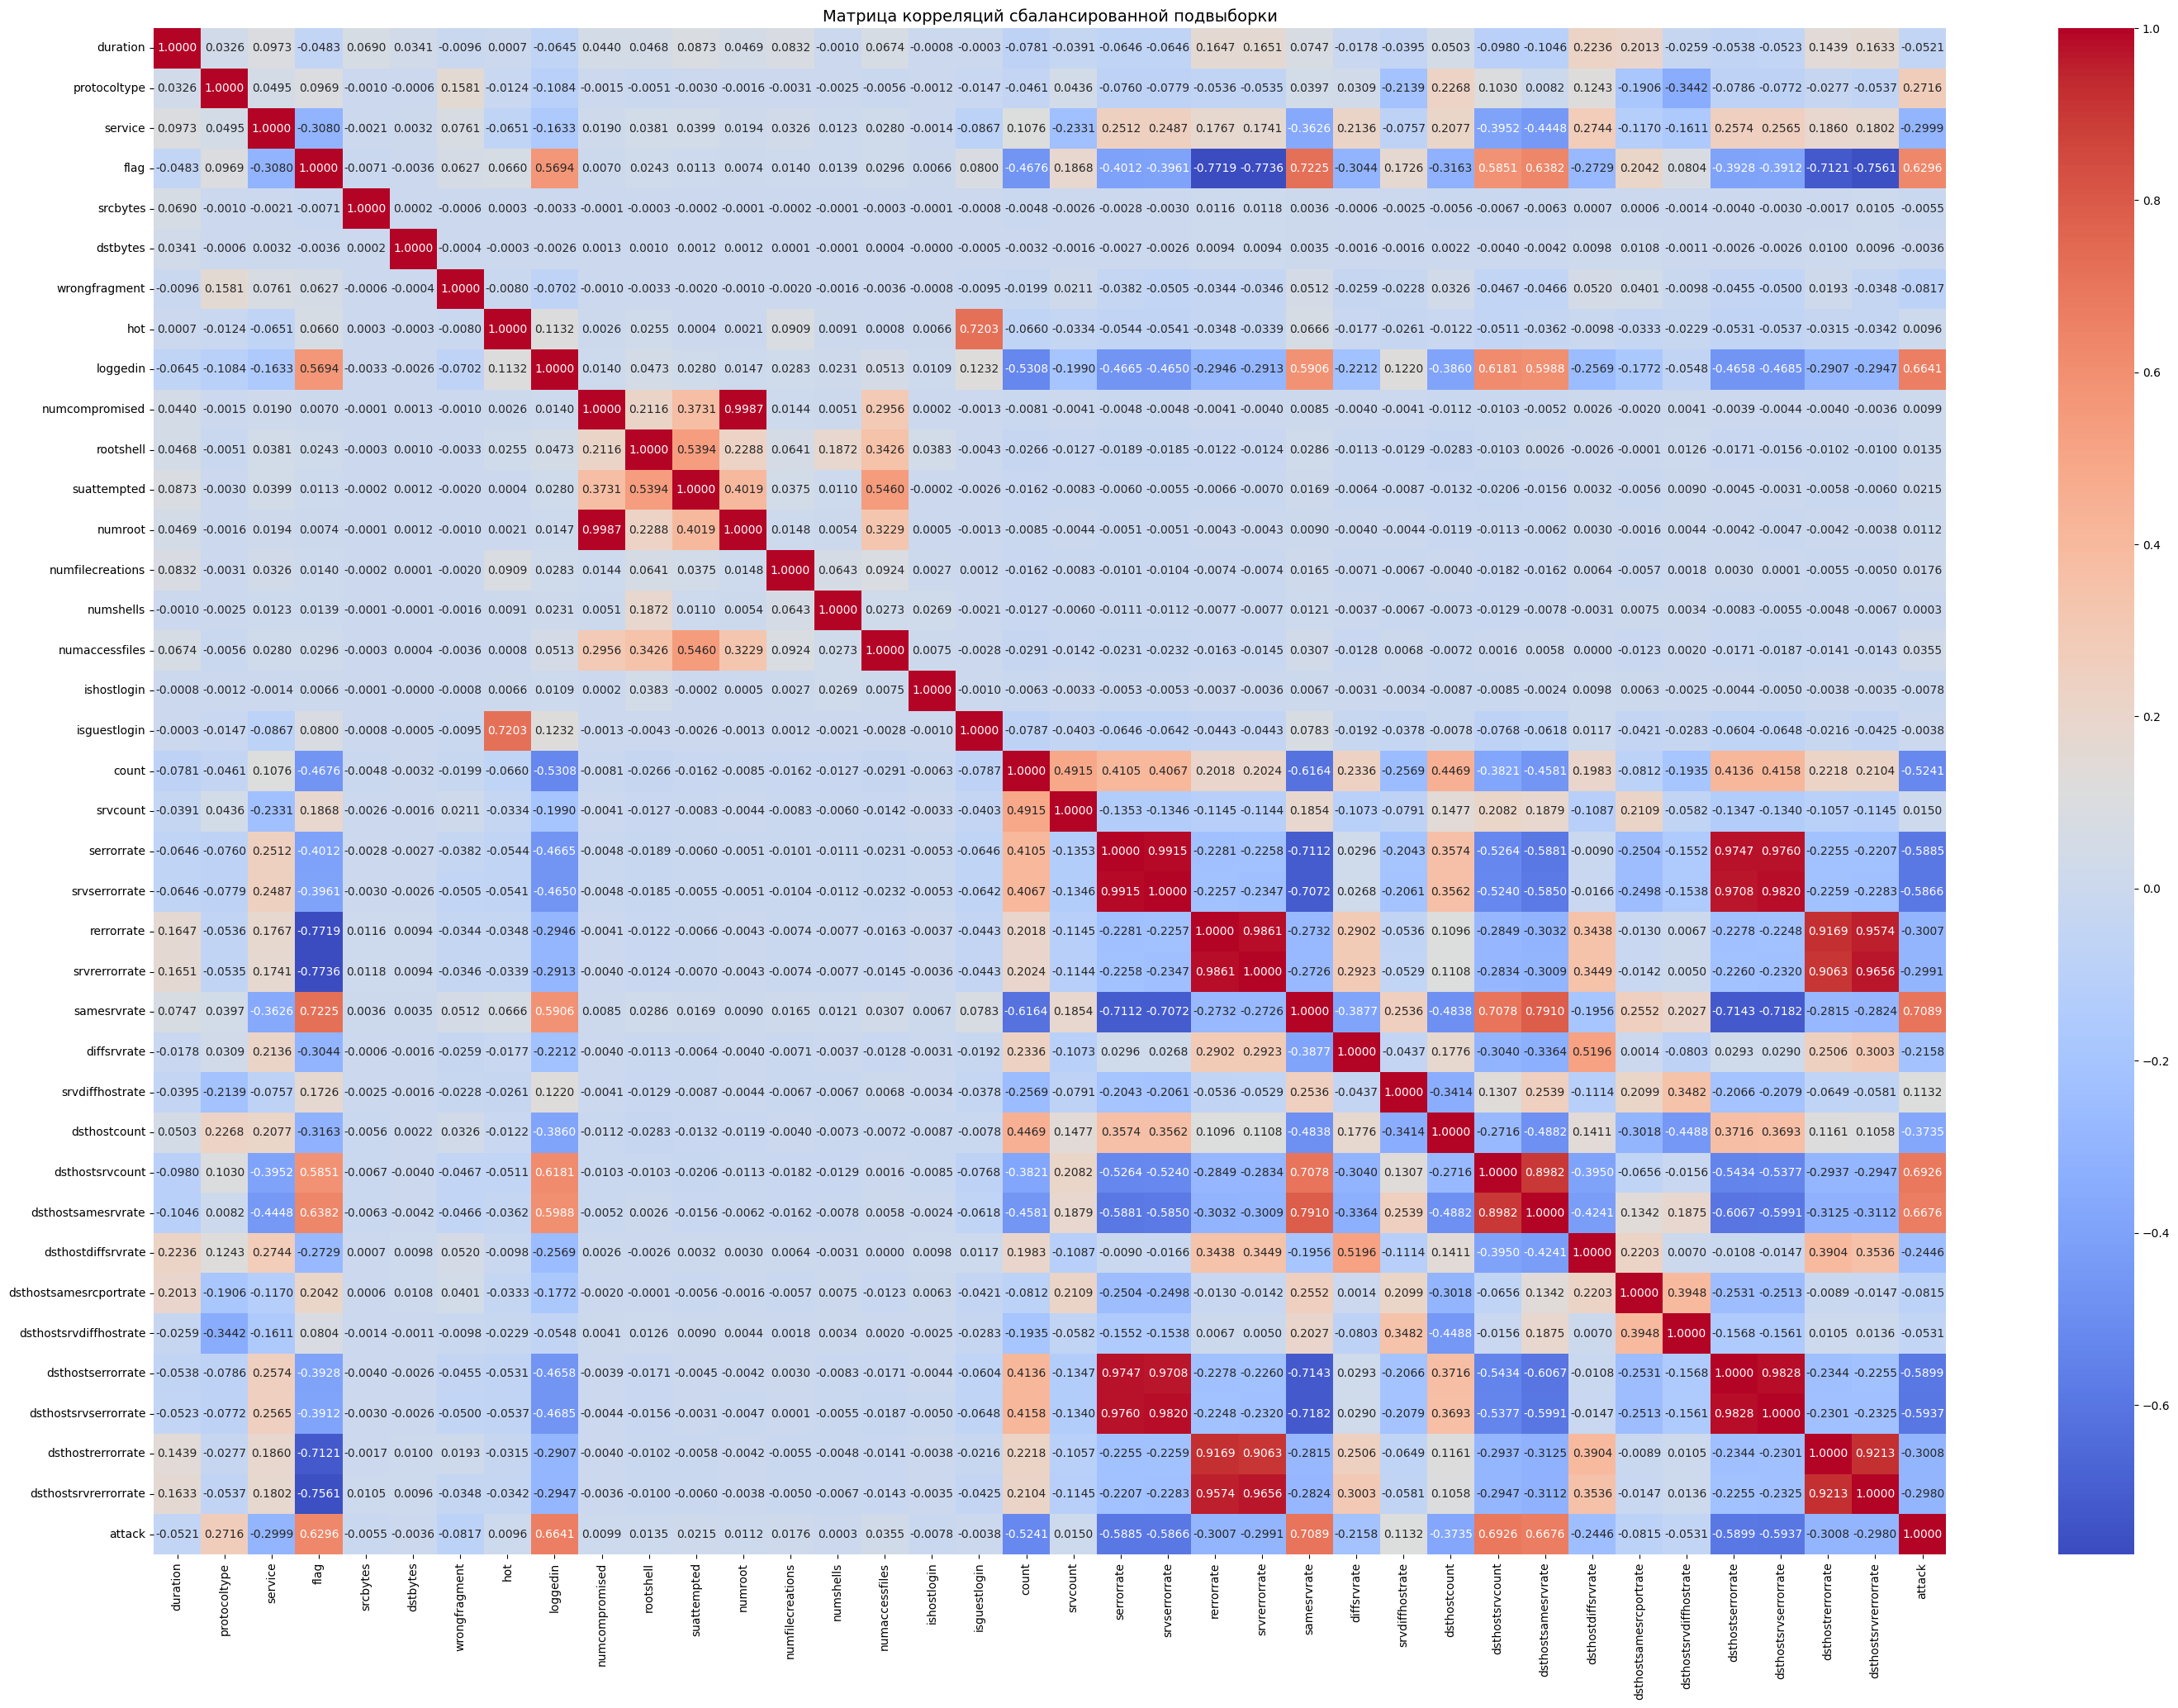

In [ ]:
# Создаем фигуру и ось для отображения матрицы корреляций
f, ax = plt.subplots(1, 1, figsize=(35, 24))

# Вычисляем корреляцию между признаками нового сбалансированного DataFrame
correlation_matrix = combined_df.corr()

# Построим тепловую карту для визуализации матрицы корреляций
# Используем палитру 'coolwarm' для улучшения восприятия
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', ax=ax)

# Устанавливаем заголовок к графику
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

# Отображаем график
plt.show()

По матрице корреляции видно, что некоторые признаки сильно коррелируют между собой (по сути обозначают одно и то же), из каждой пары удалим один признак


In [ ]:
combined_df.drop(['numroot','serrorrate','rerrorrate','dsthostrerrorrate', 'srvserrorrate', 'dsthostserrorrate', 'srvrerrorrate',  ],axis=1,inplace=True)

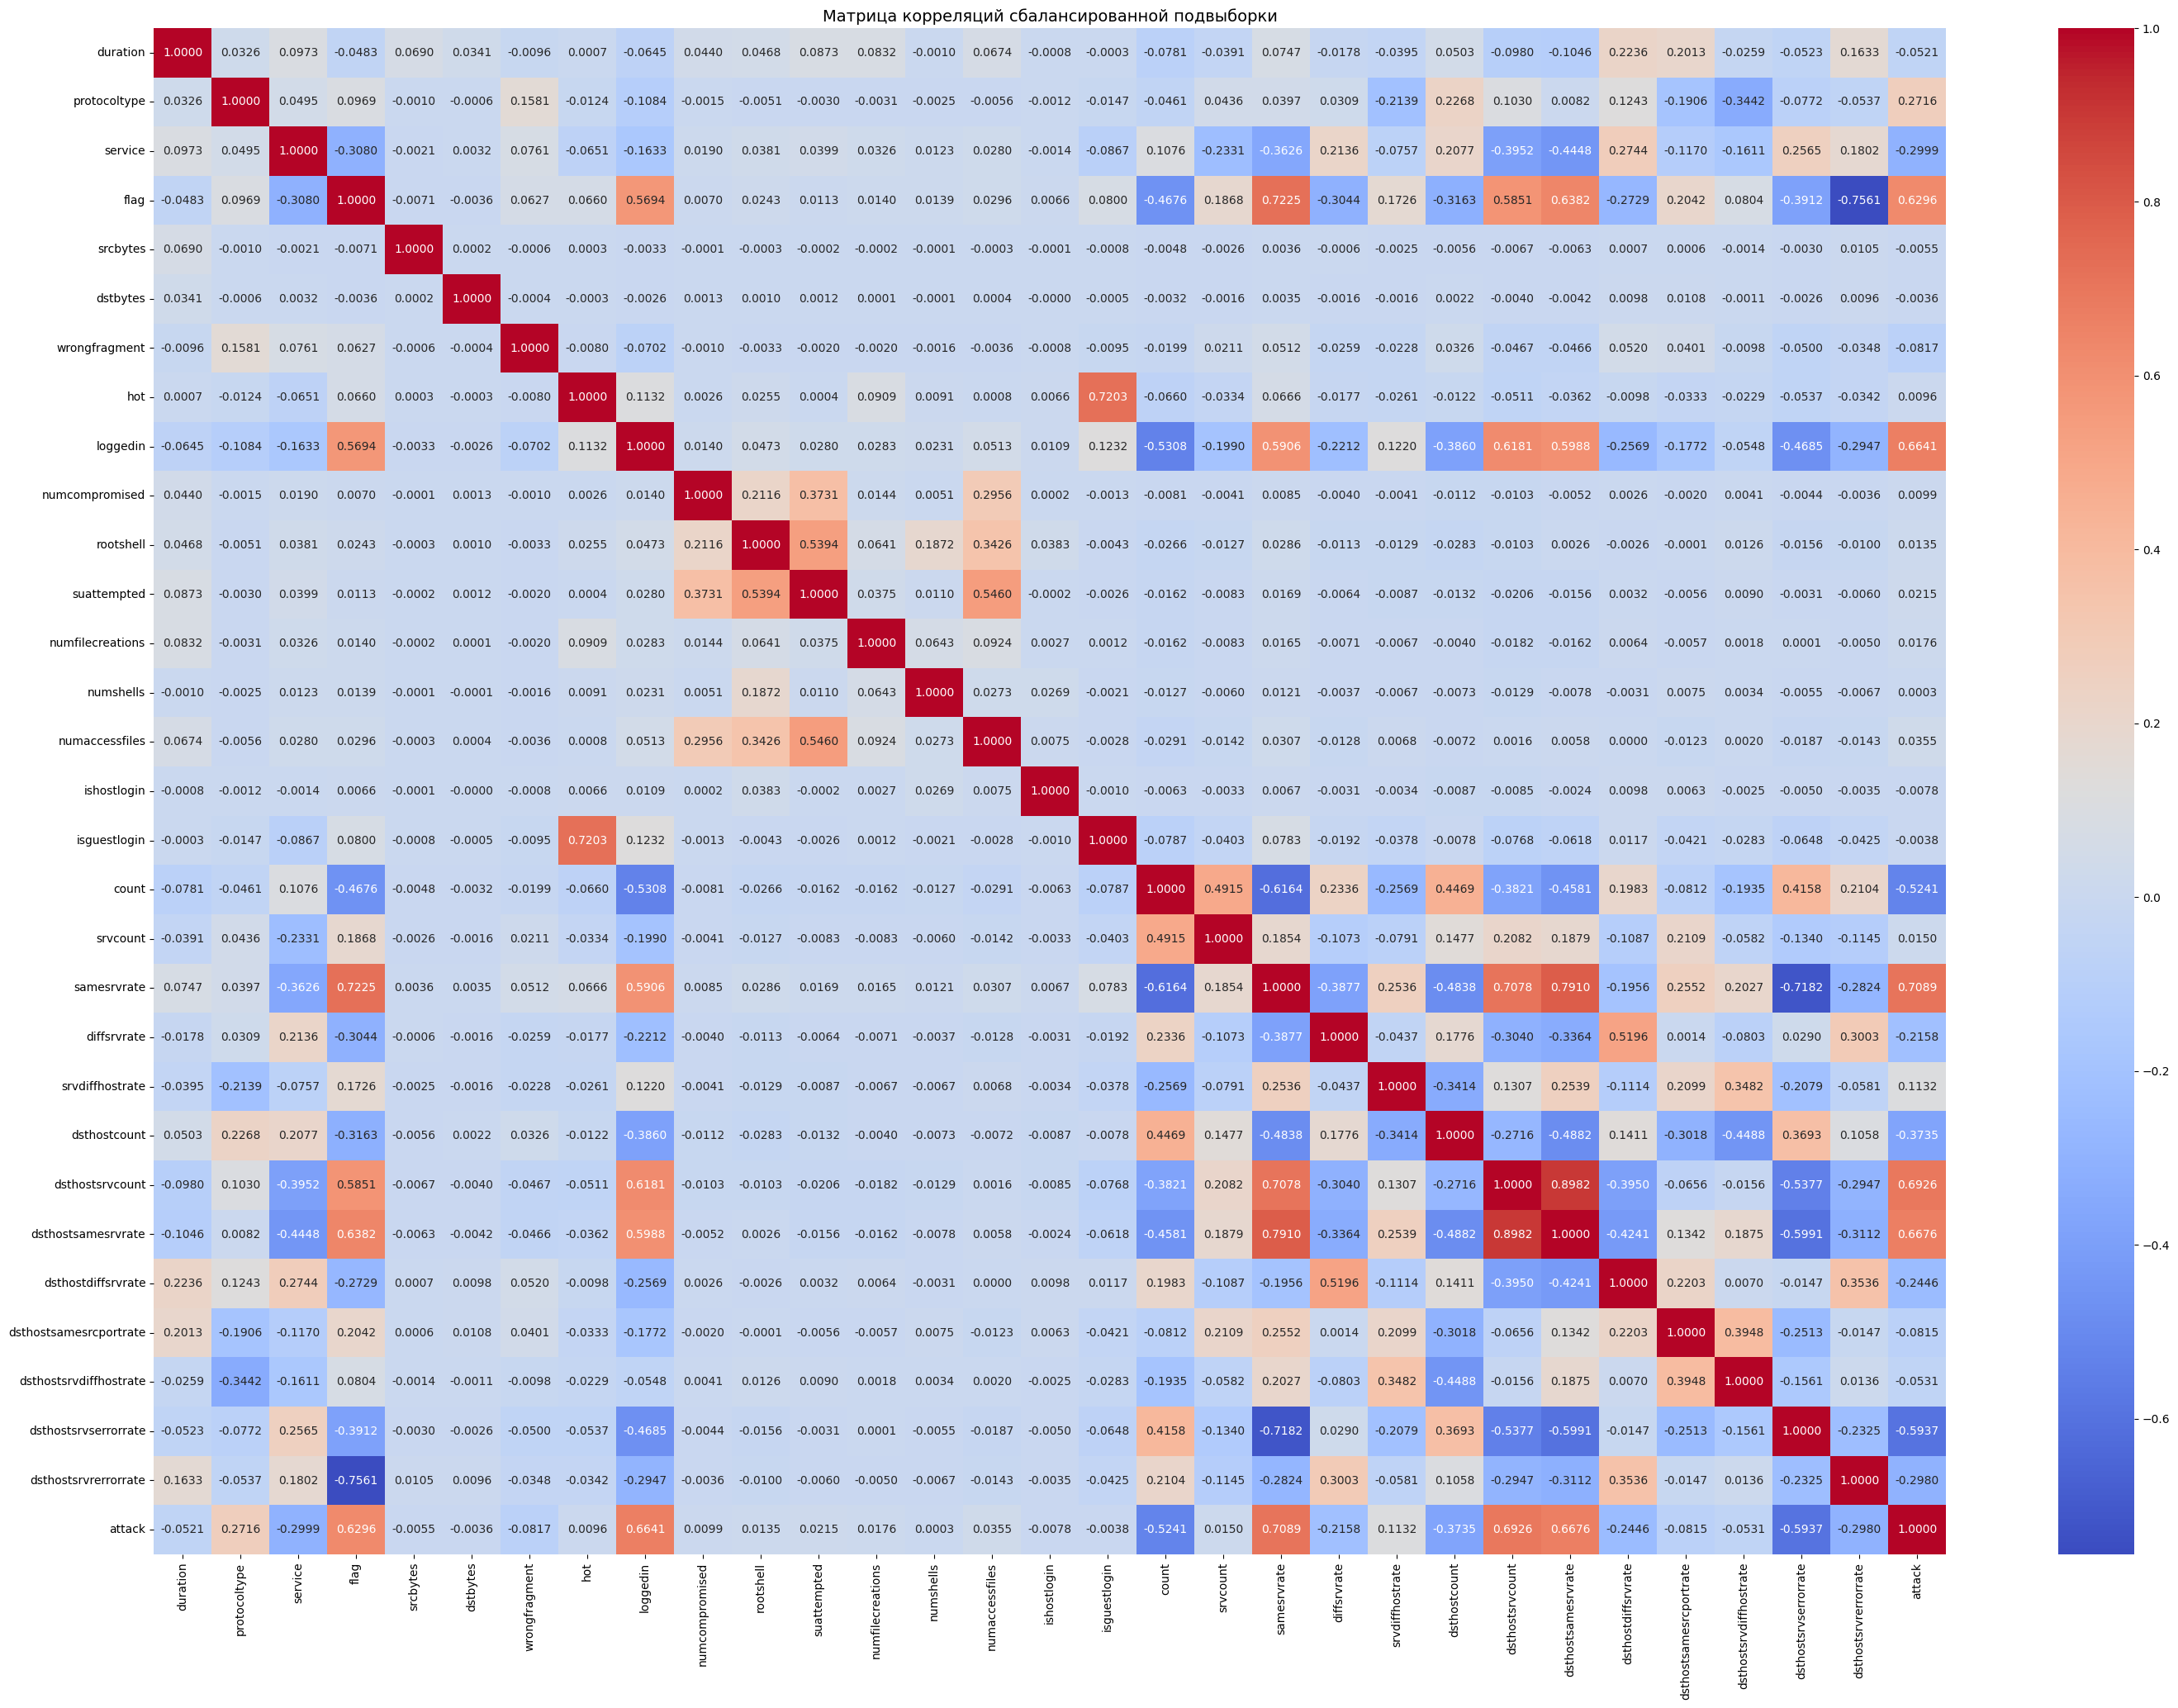

In [ ]:
# Создаем фигуру и ось для отображения матрицы корреляций
f, ax = plt.subplots(1, 1, figsize=(35, 24))

# Вычисляем корреляцию между признаками нового сбалансированного DataFrame
correlation_matrix = combined_df.corr()

# Построим тепловую карту для визуализации матрицы корреляций
# Используем палитру 'coolwarm' для улучшения восприятия
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', ax=ax)

# Устанавливаем заголовок к графику
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

# Отображаем график
plt.show()

In [ ]:
X=combined_df.drop(['attack'],axis=1)
y=combined_df['attack']

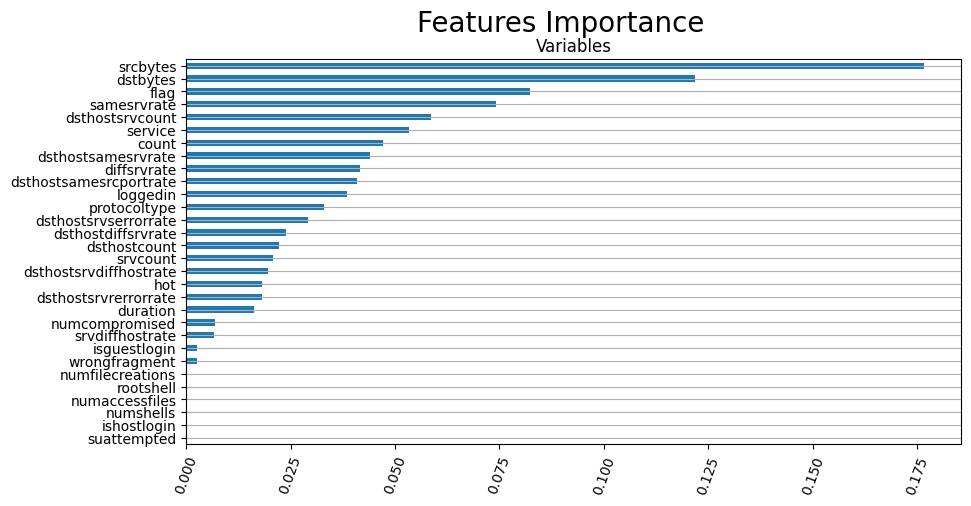

In [ ]:
from sklearn import ensemble  # Импортируем библиотеку для работы с моделями ансамблей

'''
Оцениваем важность каждой фичи с помощью RandomForestClassifier
'''

# Создаем объект StandardScaler
scaler = StandardScaler()

# Обучаем scaler на данных X
scaler.fit(X)

# Применяем трансформацию к тренировочным и тестовым данным
X_dop = scaler.transform(X)


# Превращаем numpy массивы обратно в DataFrame
X_dop = pd.DataFrame(X_dop, columns=X.columns)

# Преобразование сбалансированного набора данных в массивы значений
X_ = X_dop.values  # Признаки
y_ = y.values  # Целевая переменная

# Получаем имена признаков из DataFrame
feature_names = X.columns.tolist()  # Список имен столбцов в X

# Инициализация модели Random Forest для классификации
model = ensemble.RandomForestClassifier(n_estimators=100,  # Количество деревьев в лесу
                                         criterion="entropy",  # Критерий для оценки качества разбиения
                                         random_state=0)  # Задаем seed для воспроизводимости

# Обучение модели на подготовленных данных
model.fit(X_, y_)

# Оценка важности признаков
importances = model.feature_importances_  # Оценки важности всех признаков модели

# Создаем DataFrame для хранения важностей признаков
dtf_importances = pd.DataFrame({
    "IMPORTANCE": importances,  # Столбец с важностями
    "VARIABLE": feature_names   # Столбец с именами признаков
}).sort_values("IMPORTANCE", ascending=False)  # Сортируем по убыванию важности

# Добавляем столбец с кумулятивной суммой важностей
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)

# Устанавливаем имена признаков в качестве индексов
dtf_importances = dtf_importances.set_index("VARIABLE")

## Настройка графика
'''
Формируем надписи для графика
- ticks: местоположения меток по оси x (можно передать пустой список для удаления меток).
- labels: метки для размещения в заданных местах тиков (можно передать только в случае наличия тиков).
- kwargs: текстовые свойства для изменения оформления меток.
Функция Matplotlib xticks() возвращает:
- locs: список местоположений xtick.
- labels: список текстовых объектов xlabel.
plt.grid: Настройка линий сетки.
'''

# Создание графика
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 5), dpi=100)  # Инициализация фигуры и осей
fig.suptitle("Features Importance", fontsize=20)  # Заголовок графика
ax.title.set_text('Variables')  # Подпись оси

# Построение горизонтальной столбчатой диаграммы важности признаков
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh",  # Тип графика - горизонтальная столбчатая диаграмма
    legend=False,  # Отключаем легенду
    ax=ax  # Указываем ось для построения
).grid(axis="x")  # Настраиваем  сетку по оси x

ax.set(ylabel="")  # Удаляем метку по оси y, если она не нужна

plt.xticks(rotation=70)  # Поворот меток по оси x на 70 градусов для лучшей читаемости
plt.grid(axis='both')  # Настройка линий сетки по обеим осям

'''
Отрисовываем график
'''
plt.show()  # Показываем график на экране

In [ ]:
feature_names = X.columns.tolist()# имена столбцов в data.
print(feature_names)

['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'wrongfragment', 'hot', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numfilecreations', 'numshells', 'numaccessfiles', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate', 'dsthostsrvrerrorrate']


In [ ]:
# Указанные столбцы, которые мы хотим сохранить
columns_to_keep = ['srcbytes',  'protocoltype', 'count', 'dstbytes', 'service', 'diffsrvrate', 'flag', 'srvcount',  'samesrvrate', 'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvserrorrate',  'loggedin', 'dsthostsamesrvrate']

# Удаляем все столбцы, кроме указанных
X = X[columns_to_keep]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
# Создаем объект StandardScaler, который будет использоваться для стандартизации данных
scaler = StandardScaler()

# Применяем метод fit к данным X, чтобы вычислить среднее и стандартное отклонение,
# необходимые для стандартизации
scaler.fit(X)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_transformed = scaler.transform(X_train)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_transformed_test = scaler.transform(X_test)



    Random Forest (Случайный лес):

    Особенность: Это ансамблевая модель, использующая множество деревьев решений. Она объединяет результаты нескольких деревьев для улучшения точности и уменьшения переобучения.
    Как работает: Каждое дерево обучения строится на случайной выборке данных и случайной подвыборке признаков. Предсказания каждого дерева аггрегируются (чаще всего голосованием для классификации и средним для регрессии).

    Gradient Boosting (Градиентный бустинг):

    Особенность: Эта техника строит модель последовательно, где каждое новое дерево исправляет ошибки предыдущих. Это делает модель более точной.
    Как работает: Градиентный бустинг минимизирует ошибку, используя градиентный спуск. Каждое последующее дерево обучается на остатках (ошибках) предыдущего дерева, что позволяет улучшать результаты предсказаний.

    Naive Bayes (Наивный байесовский классификатор):

    Особенность: Основан на теореме Байеса и предполагает, что все признаки независимы друг от друга. Это делает его простым и быстрым в обучении.
    Как работает: Рассчитывает вероятность принадлежности к каждому классу, используя условные вероятности признаков. Выбирает класс с максимальной вероятностью как результат.

    Regularized Logistic Regression (Регуляризованная логистическая регрессия):

    Особенность: Это разновидность логистической регрессии, которая включает регуляризацию для предотвращения переобучения.
    Как работает: Использует логистическую функцию для моделирования вероятности принадлежности к классу, добавляя штраф (L1 или L2) в функцию потерь, чтобы управлять сложностью модели.

    XGBoost:

    Особенность: Это продвинутый алгоритм градиентного бустинга, который оптимизирован для скорости и производительности. Популярен в конкурсах по анализу данных.
    Как работает: Объединяет идеи градиентного бустинга и регуляризации. Эффективно использует параллельное вычисление и обработку отсутствующих данных, улучшая общую производительность модели.

    Decision Tree (Дерево решений):

    Особенность: Простой и легко интерпретируемый метод. Дерево решений делит данные на подгруппы на основе значений признаков.
    Как работает: Построение дерева начинается с корня, затем включает узлы (разделения) и листья (результаты), где каждое разделение выбирается в зависимости от наилучшего критерия (например, прирост информации).

    Support Vector Machine (Метод опорных векторов):

    Особенность: Это мощный метод, подходящий как для линейной, так и для нелинейной классификации. Работает в высокоразмерных пространствах.
    Как работает: Находит гиперплоскость, которая максимизирует расстояние между классами. При использовании ядровых функций может эффективно решать задачи в нелинейной области.


In [ ]:
#Случайный лес (Random Forest)
# Создаем модель случайного леса
rf_classifier = RandomForestClassifier()

# Обучаем модель
rf_classifier.fit(X_transformed, y_train)

RandomForestClassifier()

In [ ]:
labels = ['Non attack', 'attack']
prediction = rf_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       1.00      0.99      1.00     21439
      attack       0.99      1.00      1.00     23117

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



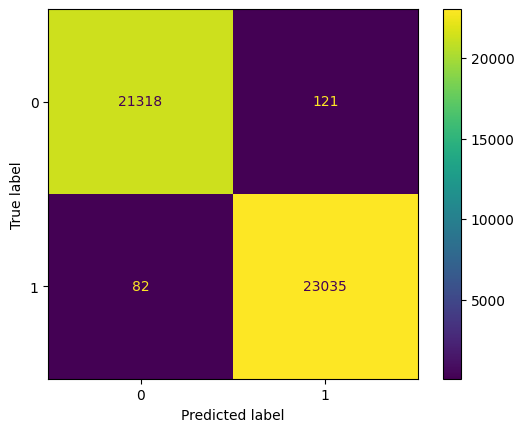

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9954439357213395


In [ ]:
results_test = {
    "Random Forest":  f"{round(accuracy, 4) * 100}%"
}

In [ ]:
#Градиентный бустинг (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга
gb_classifier = GradientBoostingClassifier()

# Обучаем модель
gb_classifier.fit(X_transformed, y_train)

GradientBoostingClassifier()

In [ ]:
labels = ['Non attack', 'attack']
prediction = gb_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.99      0.98      0.99     21439
      attack       0.98      0.99      0.99     23117

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



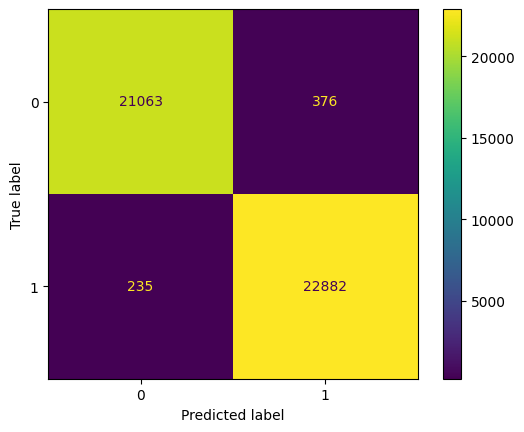

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9862869198312236


In [ ]:
results_test["Gradient Boosting"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Наивный байесовский классификатор (Naive Bayes Classifier)
from sklearn.naive_bayes import GaussianNB

# Создаем модель наивного байесовского классификатора
nb_classifier = GaussianNB()

# Обучаем модель
nb_classifier.fit(X_transformed, y_train)

GaussianNB()

In [ ]:
labels = ['Non attack', 'attack']
prediction = nb_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.92      0.81      0.86     21439
      attack       0.84      0.93      0.88     23117

    accuracy                           0.87     44556
   macro avg       0.88      0.87      0.87     44556
weighted avg       0.88      0.87      0.87     44556



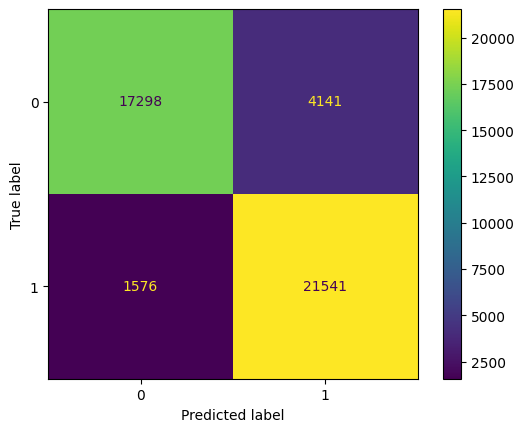

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.8716895592063919


In [ ]:
results_test["Naive Bayes"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Логистическая регрессия с регуляризацией (Regularized Logistic Regression)
from sklearn.linear_model import LogisticRegressionCV

# Создаем модель логистической регрессии
log_reg_cv = LogisticRegressionCV()

# Обучаем модель
log_reg_cv.fit(X_transformed, y_train)

LogisticRegressionCV()

In [ ]:
labels = ['Non attack', 'attack']
prediction = log_reg_cv.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.94      0.89      0.91     21439
      attack       0.90      0.95      0.92     23117

    accuracy                           0.92     44556
   macro avg       0.92      0.92      0.92     44556
weighted avg       0.92      0.92      0.92     44556



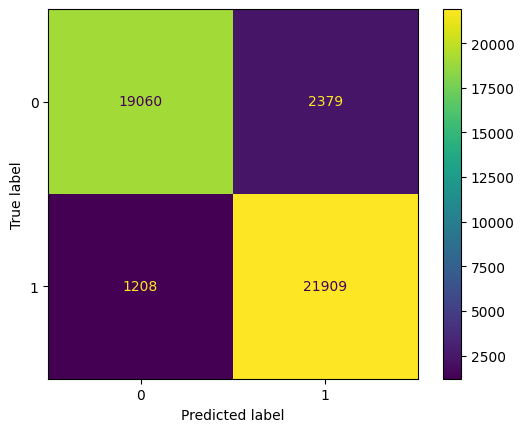

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9194945686327318


In [ ]:
results_test["LogisticRegressionCV"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Extreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier

# Создаем модель XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучаем модель
xgb_classifier.fit(X_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
labels = ['Non attack', 'attack']
prediction = xgb_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       1.00      0.99      1.00     21439
      attack       1.00      1.00      1.00     23117

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



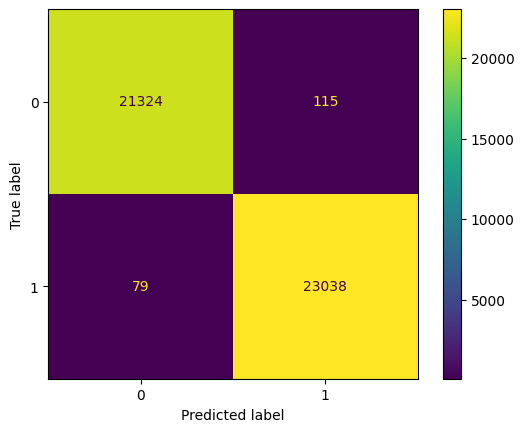

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9956459287189156


In [ ]:
results_test["XGBClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Дерево решений (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Создаем модель дерева решений
dt_classifier = DecisionTreeClassifier()

# Обучаем модель
dt_classifier.fit(X_transformed, y_train)

DecisionTreeClassifier()

In [ ]:
labels = ['Non attack', 'attack']
prediction = dt_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.99      0.99      0.99     21439
      attack       0.99      0.99      0.99     23117

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



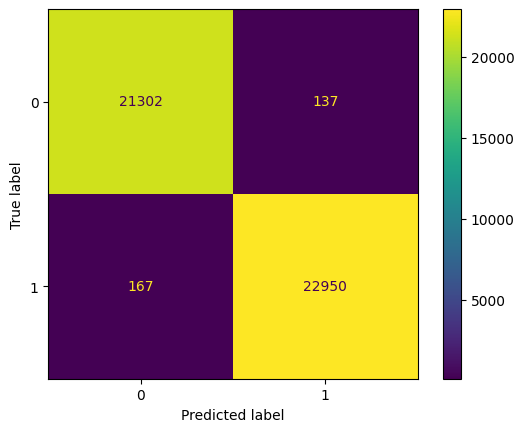

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9931771254152079


In [ ]:
results_test["DecisionTreeClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Метод опорных векторов (Support Vector Machine)
from sklearn.svm import SVC
# Создаем модель SVM
svm_classifier = SVC()

# Обучаем модель
svm_classifier.fit(X_transformed, y_train)

SVC()

In [ ]:
labels = ['Non attack', 'attack']
prediction = svm_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.97      0.95      0.96     21439
      attack       0.95      0.97      0.96     23117

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556



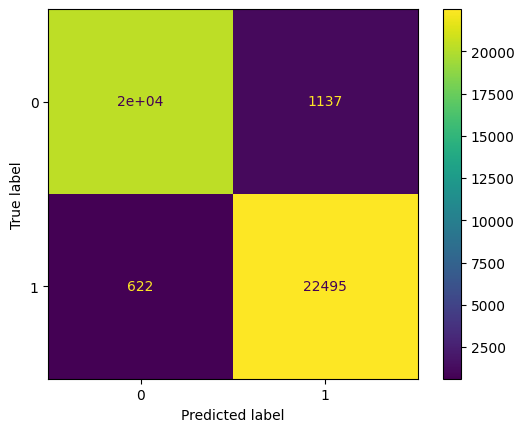

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9605215908070742


In [ ]:
results_test["SVC"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Логистическая регрессия (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Создаем модель логистической регрессии
log_reg = LogisticRegression()

# Обучаем модель
log_reg.fit(X_transformed, y_train)

LogisticRegression()

In [ ]:
labels = ['Non attack', 'attack']
prediction = log_reg.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.94      0.89      0.91     21439
      attack       0.90      0.95      0.92     23117

    accuracy                           0.92     44556
   macro avg       0.92      0.92      0.92     44556
weighted avg       0.92      0.92      0.92     44556



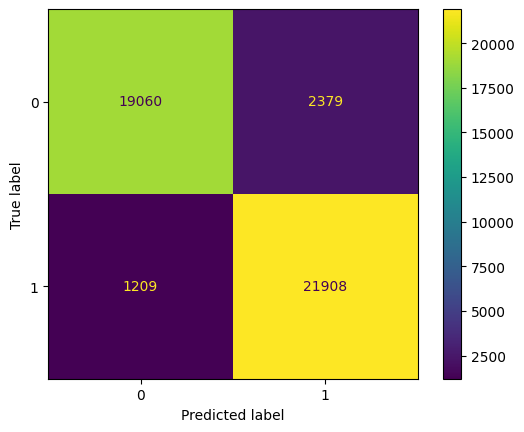

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9194721249663345


In [ ]:
results_test["LogisticRegression"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
for key, value in results_test.items():
    print(f"{key}: {value}")

Random Forest: 99.53999999999999%
Gradient Boosting: 98.63%
Naive Bayes: 87.17%
LogisticRegressionCV: 91.95%
XGBClassifier: 99.56%
DecisionTreeClassifier: 99.32%
SVC: 96.05%
LogisticRegression: 91.95%


#Лучшие результаты показала модель XGBClassifier

## Мультиномиальная классификация



In [ ]:
df = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df = df.drop('lastflag', axis = 1)
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
df_test = pd.read_csv("Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df_test = df_test.drop('lastflag', axis = 1)
df_test

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
combined_df = pd.concat([df, df_test], ignore_index=True)


In [ ]:
# Подсчет количества всех типов атак
attack_counts = combined_df['attack'].value_counts()

# Вывод результата
print("Количество атак по типам:")
print(attack_counts)

Количество атак по типам:
attack
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack        

In [ ]:
combined_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [ ]:
combined_df['attack'].loc[combined_df['attack'] == 'neptune'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'satan'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'ipsweep'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'smurf'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'portsweep'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'nmap'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'back'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'guess_passwd'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'mscan'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'warezmaster'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'teardrop'] = 'U2R'
combined_df['attack'].loc[combined_df['attack'] == 'warezclient'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'apache2'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'processtable'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'snmpguess'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'saint'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'mailbomb'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'pod'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'snmpgetattack'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'httptunnel'] = 'R2L'


combined_df['attack'].loc[combined_df['attack'] == 'buffer_overflow'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'land'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'multihop'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'rootkit'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'named'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'ps'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'sendmail'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'xterm'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'imap'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'loadmodule'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'ftp_write'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'xlock'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'phf'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'perl'] = 'U2R'
combined_df['attack'].loc[combined_df['attack'] == 'xsnoop'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'spy'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'worm'] = 'U2R'
combined_df['attack'].loc[combined_df['attack'] == 'sqlattack'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'udpstorm'] = 'Ddos'



attack
normal    77054
Ddos      52239
Prob      14152
R2L        4161
U2R         911
Name: count, dtype: int64


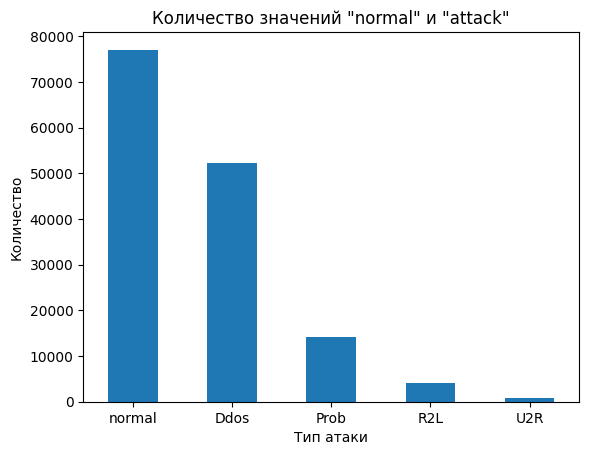

In [ ]:
count = combined_df['attack'].value_counts()

# Вывод количества значений
print(count)

# Построение гистограммы
count.plot(kind='bar')
plt.title('Количество значений "normal" и "attack"')
plt.xlabel('Тип атаки')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

In [ ]:
le=LabelEncoder()

# Преобразуем столбец 'protocoltype' в числовые значения с помощью кодировщика LabelEncoder
combined_df['protocoltype'] = le.fit_transform(combined_df['protocoltype'])

# Преобразуем столбец 'service' в числовые значения с помощью кодировщика LabelEncoder
combined_df['service'] = le.fit_transform(combined_df['service'])

# Преобразуем столбец 'flag' в числовые значения с помощью кодировщика LabelEncoder
combined_df['flag'] = le.fit_transform(combined_df['flag'])

# Преобразуем столбец 'attack' в числовые значения с помощью кодировщика LabelEncoder
combined_df['attack'] = le.fit_transform(combined_df['attack'])

In [ ]:
# Подсчет количества всех типов атак
attack_counts = combined_df['attack'].value_counts()

# Вывод результата
print("Количество атак по типам:")
print(attack_counts)

Количество атак по типам:
attack
4    77054
0    52239
1    14152
2     4161
3      911
Name: count, dtype: int64


In [ ]:
combined_df.drop(['numroot','serrorrate','rerrorrate','dsthostrerrorrate', 'srvserrorrate', 'dsthostserrorrate', 'srvrerrorrate',  ],axis=1,inplace=True)

In [ ]:

X=combined_df.drop(['attack'],axis=1)
y=combined_df['attack']

#Применяем метод RandomOverSampler over_sampling
from imblearn.over_sampling import RandomOverSampler

'''
Этот метод случайным образом выбирает примеры из класса-меньшинства и дублирует их, пока не достигнется баланс.
'''

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
from collections import Counter
Counter(y_resampled)

Counter({4: 77054, 0: 77054, 2: 77054, 1: 77054, 3: 77054})

attack
4    77054
0    77054
2    77054
1    77054
3    77054
Name: count, dtype: int64


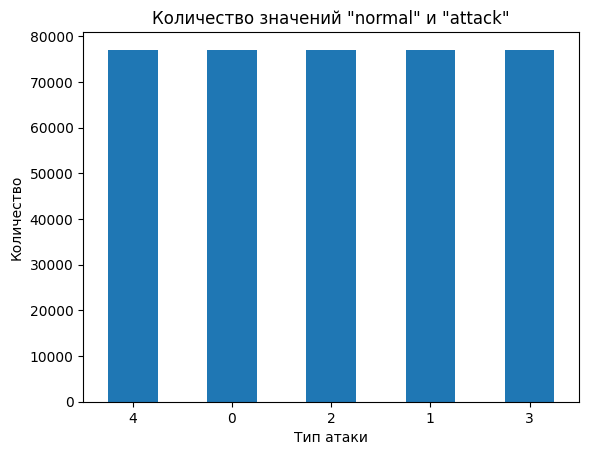

In [ ]:
balance_df = pd.concat([X_resampled, y_resampled], axis=1)
count = balance_df['attack'].value_counts()

# Вывод количества значений
print(count)

# Построение гистограммы
count.plot(kind='bar')
plt.title('Количество значений "normal" и "attack"')
plt.xlabel('Тип атаки')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

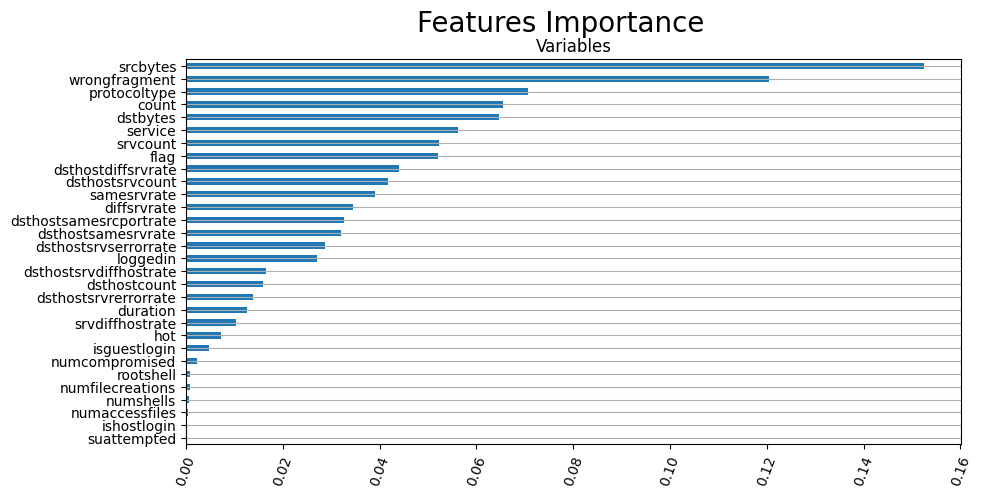

In [ ]:
from sklearn import ensemble  # Импортируем библиотеку для работы с моделями ансамблей

'''
Оцениваем важность каждой фичи с помощью RandomForestClassifier
'''

# Создаем объект StandardScaler
scaler = StandardScaler()

# Обучаем scaler на данных X
scaler.fit(X_resampled)

# Применяем трансформацию к тренировочным и тестовым данным
X_dop = scaler.transform(X_resampled)


# Превращаем numpy массивы обратно в DataFrame
X_dop = pd.DataFrame(X_dop, columns=X_resampled.columns)

# Преобразование сбалансированного набора данных в массивы значений
X = X_dop.values  # Признаки
y = y_resampled.values  # Целевая переменная

# Получаем имена признаков из DataFrame
feature_names = X_resampled.columns.tolist()  # Список имен столбцов в X_resampled


# Инициализация модели Random Forest для классификации
model = ensemble.RandomForestClassifier(n_estimators=100,  # Количество деревьев в лесу
                                         criterion="entropy",  # Критерий для оценки качества разбиения
                                         random_state=0)  # Задаем seed для воспроизводимости

# Обучение модели на подготовленных данных
model.fit(X, y)

# Оценка важности признаков
importances = model.feature_importances_  # Оценки важности всех признаков модели

# Создаем DataFrame для хранения важностей признаков
dtf_importances = pd.DataFrame({
    "IMPORTANCE": importances,  # Столбец с важностями
    "VARIABLE": feature_names   # Столбец с именами признаков
}).sort_values("IMPORTANCE", ascending=False)  # Сортируем по убыванию важности

# Добавляем столбец с кумулятивной суммой важностей
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)

# Устанавливаем имена признаков в качестве индексов
dtf_importances = dtf_importances.set_index("VARIABLE")

## Настройка графика
'''
Формируем надписи для графика
- ticks: местоположения меток по оси x (можно передать пустой список для удаления меток).
- labels: метки для размещения в заданных местах тиков (можно передать только в случае наличия тиков).
- kwargs: текстовые свойства для изменения оформления меток.
Функция Matplotlib xticks() возвращает:
- locs: список местоположений xtick.
- labels: список текстовых объектов xlabel.
plt.grid: Настройка линий сетки.
'''

# Создание графика
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 5), dpi=100)  # Инициализация фигуры и осей
fig.suptitle("Features Importance", fontsize=20)  # Заголовок графика
ax.title.set_text('Variables')  # Подпись оси

# Построение горизонтальной столбчатой диаграммы важности признаков
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh",  # Тип графика - горизонтальная столбчатая диаграмма
    legend=False,  # Отключаем легенду
    ax=ax  # Указываем ось для построения
).grid(axis="x")  # Настраиваем  сетку по оси x

ax.set(ylabel="")  # Удаляем метку по оси y, если она не нужна

plt.xticks(rotation=70)  # Поворот меток по оси x на 70 градусов для лучшей читаемости
plt.grid(axis='both')  # Настройка линий сетки по обеим осям

'''
Отрисовываем график
'''
plt.show()  # Показываем график на экране

In [ ]:
feature_names = X_resampled.columns.tolist()# имена столбцов в data.
print(feature_names)

['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'wrongfragment', 'hot', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numfilecreations', 'numshells', 'numaccessfiles', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate', 'dsthostsrvrerrorrate']


In [ ]:
# Указанные столбцы, которые мы хотим сохранить
columns_to_keep = ['srcbytes', 'wrongfragment',  'protocoltype', 'count', 'dstbytes', 'service', 'diffsrvrate', 'flag', 'srvcount',  'samesrvrate', 'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvserrorrate',  'loggedin', 'dsthostsamesrvrate']

# Удаляем все столбцы, кроме указанных
X_resampled = X_resampled[columns_to_keep]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42, stratify = y_resampled)

In [ ]:
# Создаем объект StandardScaler, который будет использоваться для стандартизации данных
scaler = StandardScaler()

# Применяем метод fit к данным X, чтобы вычислить среднее и стандартное отклонение,
# необходимые для стандартизации
scaler.fit(X_resampled)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_train = scaler.transform(X_train)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_test = scaler.transform(X_test)

In [ ]:
#Случайный лес (Random Forest)
# Создаем модель случайного леса
rf_classifier = RandomForestClassifier()

# Обучаем модель
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = rf_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       1.00      1.00      1.00     23116
         R2L       1.00      1.00      1.00     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      1.00      1.00     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



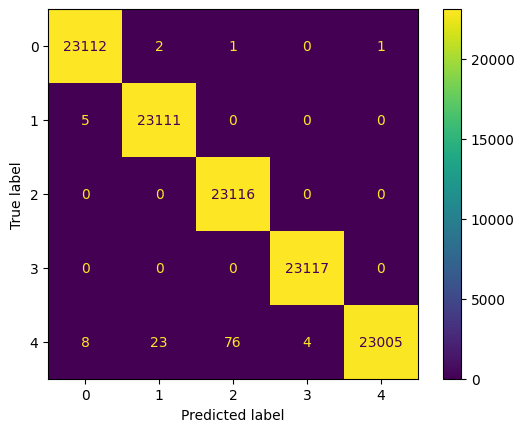

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9989617670724427


In [ ]:
results_test = {
    "Random Forest":  f"{round(accuracy, 4) * 100}%"
}

In [ ]:
#Градиентный бустинг (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга
gb_classifier = GradientBoostingClassifier()

# Обучаем модель
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = gb_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       0.99      0.99      0.99     23116
         R2L       0.97      0.99      0.98     23116
         U2R       1.00      1.00      1.00     23117
      normal       0.98      0.97      0.97     23116

    accuracy                           0.99    115581
   macro avg       0.99      0.99      0.99    115581
weighted avg       0.99      0.99      0.99    115581



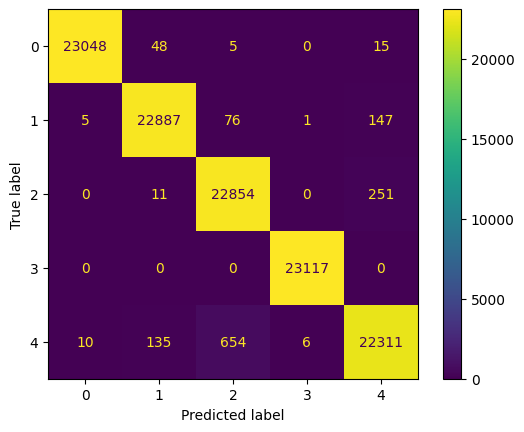

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9881987523900987


In [ ]:
results_test["Gradient Boosting"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Наивный байесовский классификатор (Naive Bayes Classifier)
from sklearn.naive_bayes import GaussianNB

# Создаем модель наивного байесовского классификатора
nb_classifier = GaussianNB()

# Обучаем модель
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = nb_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.75      0.93      0.83     23116
        Prob       0.89      0.57      0.69     23116
         R2L       0.61      0.59      0.60     23116
         U2R       0.99      0.99      0.99     23117
      normal       0.59      0.66      0.62     23116

    accuracy                           0.75    115581
   macro avg       0.76      0.75      0.75    115581
weighted avg       0.76      0.75      0.75    115581



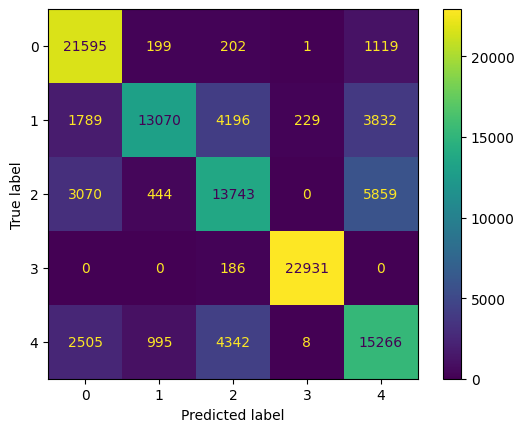

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.7493013557591646


In [ ]:
results_test["Naive Bayes"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Логистическая регрессия с регуляризацией (Regularized Logistic Regression)
from sklearn.linear_model import LogisticRegressionCV

# Создаем модель логистической регрессии
log_reg_cv = LogisticRegressionCV()

# Обучаем модель
log_reg_cv.fit(X_train, y_train)

LogisticRegressionCV()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = log_reg_cv.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.97      0.93      0.95     23116
        Prob       0.91      0.92      0.92     23116
         R2L       0.77      0.93      0.84     23116
         U2R       1.00      0.99      1.00     23117
      normal       0.89      0.73      0.80     23116

    accuracy                           0.90    115581
   macro avg       0.91      0.90      0.90    115581
weighted avg       0.91      0.90      0.90    115581



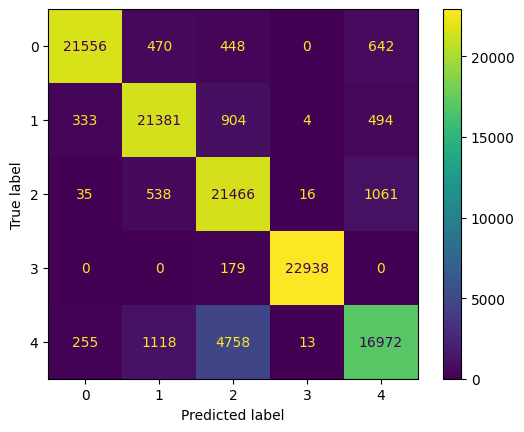

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9025099281023697


In [ ]:
results_test["LogisticRegressionCV"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Extreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier

# Создаем модель XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучаем модель
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = xgb_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       1.00      1.00      1.00     23116
         R2L       0.99      1.00      1.00     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      0.99      1.00     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



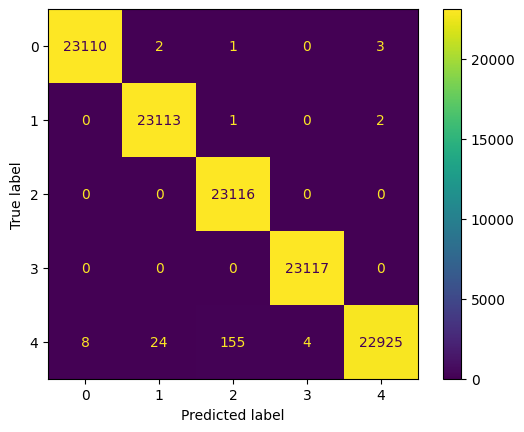

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9982696117874045


In [ ]:
results_test["XGBClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Дерево решений (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Создаем модель дерева решений
dt_classifier = DecisionTreeClassifier()

# Обучаем модель
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = dt_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       1.00      1.00      1.00     23116
         R2L       1.00      1.00      1.00     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      0.99      1.00     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



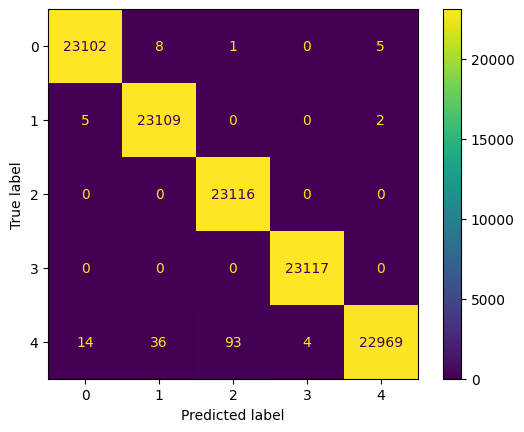

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9985464739014198


In [ ]:
results_test["DecisionTreeClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Метод опорных векторов (Support Vector Machine)
from sklearn.svm import SVC
# Создаем модель SVM
svm_classifier = SVC()

# Обучаем модель
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = svm_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.99      0.97      0.98     23116
        Prob       0.97      0.99      0.98     23116
         R2L       0.93      0.96      0.94     23116
         U2R       1.00      1.00      1.00     23117
      normal       0.93      0.92      0.93     23116

    accuracy                           0.97    115581
   macro avg       0.97      0.97      0.97    115581
weighted avg       0.97      0.97      0.97    115581



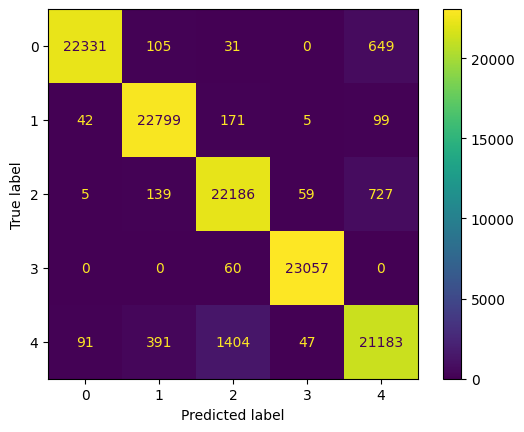

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9651759372215156


In [ ]:
results_test["SVC"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
#Логистическая регрессия (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Создаем модель логистической регрессии
log_reg = LogisticRegression()

# Обучаем модель
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = log_reg.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.97      0.93      0.95     23116
        Prob       0.91      0.92      0.92     23116
         R2L       0.77      0.92      0.84     23116
         U2R       1.00      0.99      1.00     23117
      normal       0.88      0.73      0.80     23116

    accuracy                           0.90    115581
   macro avg       0.91      0.90      0.90    115581
weighted avg       0.91      0.90      0.90    115581



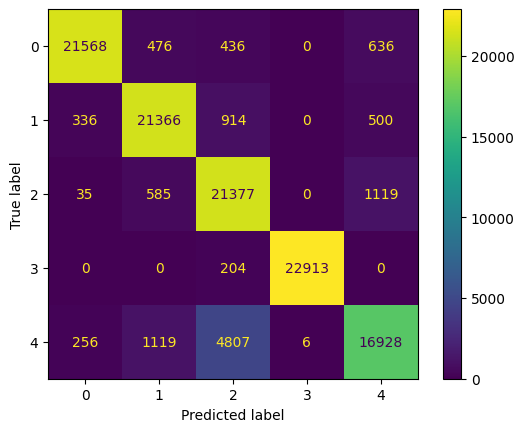

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9011169655912304


In [ ]:
results_test["LogisticRegression"] =  f"{round(accuracy, 4) * 100}%"

In [ ]:
for key, value in results_test.items():
    print(f"{key}: {value}")

Random Forest: 99.9%
Gradient Boosting: 98.82%
Naive Bayes: 74.92999999999999%
LogisticRegressionCV: 90.25%
XGBClassifier: 99.83%
DecisionTreeClassifier: 99.85000000000001%
SVC: 96.52%
LogisticRegression: 90.11%


## Одной из лучших моделей, как и в случае с бинарной классификацей, оказалась Random Forest